# Matplotlib

## Contents

  - [Overview](#Overview)  
  - [The APIs](#The-APIs)  
  - [More Features](#More-Features)  
  - [Further Reading](#Further-Reading)  

## Overview

[Matplotlib](http://matplotlib.org/) is an outstanding graphics library, designed for scientific computing, with

- high quality 2D and 3D plots  
- output in all the usual formats (PDF, PNG, etc.)  
- LaTeX integration  
- fine grained control over all aspects of presentation  
- animation, etc.  

### Matplotlib’s Split Personality

Matplotlib is unusual in that it offers two different interfaces to plotting:

- One is a MATLAB-style state-based API (Application Programming Interface)

- The other is a more “Pythonic” object-oriented API - recommended because of its flexibility and power to customizing the plot

## The APIs

### The MATLAB-style API

The MATLAB-style API is encapsulated in the [pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot) module. 

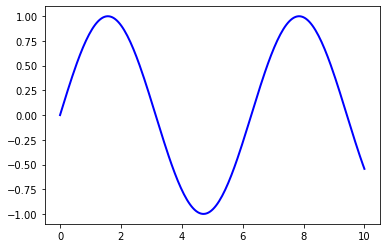

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

x = np.linspace(0, 10, 200)
y = np.sin(x)

plt.plot(x, y, 'b-', linewidth=2)
plt.show()

This is simple and convenient, but also somewhat limited and un-Pythonic. 
For example, in the function calls, a lot of objects get created and passed around without making themselves known to the programmer.

Python programmers tend to prefer a more explicit style of programming. This leads us to the alternative, object-oriented Matplotlib API.

### The Object-Oriented API

Here’s the code corresponding to the preceding figure using the object-oriented API.

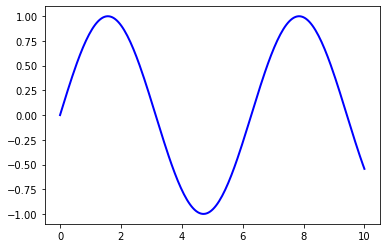

In [3]:
fig, ax = plt.subplots()
ax.plot(x, y, 'b-', linewidth=2)
plt.show()

Here the call `fig, ax = plt.subplots()` returns a pair, where

- `fig` is a `figure.Figure` instance, representing the final image that may contain one or more Axes—like a blank canvas.
- `ax` is an `figure.Axes` instance, representing an individual plot—think of a frame for plotting in.  

The `plot()` function is actually a method of `ax`.

While there’s a bit more typing, the more explicit use of objects gives us better control.

### Tweaks

Here we are changing the line to red and adding a legend. We are also setting `alpha` to make the line slightly transparent—which makes it look smoother.

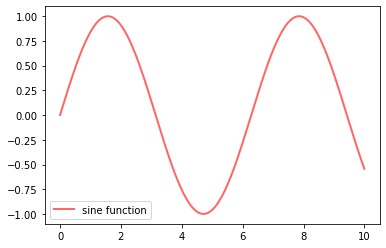

In [4]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label='sine function', alpha=0.6)
ax.legend()
plt.show()

The location of the legend can be changed by replacing `ax.legend()` with `ax.legend(loc='upper center')`.

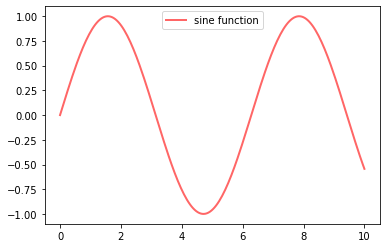

In [5]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label='sine function', alpha=0.6)
ax.legend(loc='upper center')
plt.show()

If everything is properly configured, then adding LaTeX is trivial.

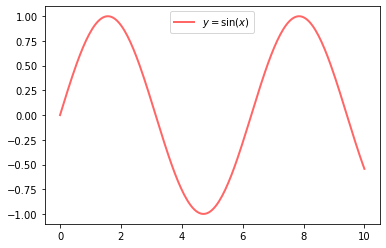

In [6]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label='$y=\sin(x)$', alpha=0.6)
ax.legend(loc='upper center')
plt.show()

Controlling the ticks, adding titles and so on is also straightforward.

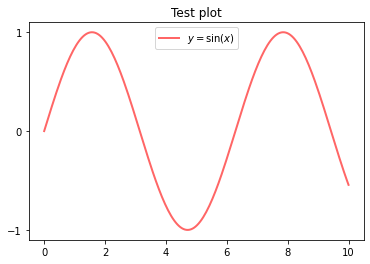

In [7]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label='$y=\sin(x)$', alpha=0.6)
ax.legend(loc='upper center')
ax.set_yticks([-1, 0, 1])
ax.set_title('Test plot')
plt.show()

In addtion to line graph, we can also make other types of graph, e.g., scatter plots. 

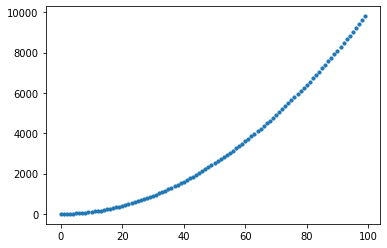

In [8]:
fig, ax = plt.subplots()
x_values = list(range(100))
squares = [x**2 for x in x_values]
ax.scatter(x_values, squares, s=10)
plt.show()

## More Features

Matplotlib has a huge array of functions and features, which you can discover over time as you have need for them.

### Multiple Plots on One Axis

It’s straightforward to generate multiple plots on the same axes.
Here’s an example that randomly generates three normal densities and adds a label with their mean.

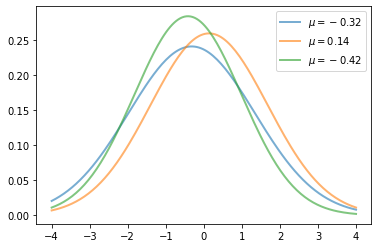

In [10]:
from scipy.stats import norm
from random import uniform

fig, ax = plt.subplots()
x = np.linspace(-4, 4, 150)
for i in range(3):
    m, s = uniform(-1, 1), uniform(1, 2)
    y = norm.pdf(x, loc=m, scale=s)
    current_label = f'$\mu = {m:.2}$'
    ax.plot(x, y, linewidth=2, alpha=0.6, label=current_label)
ax.legend()
plt.show()

### Multiple Subplots

Sometimes we want multiple subplots in one figure.
Here’s an example that generates 6 histograms.

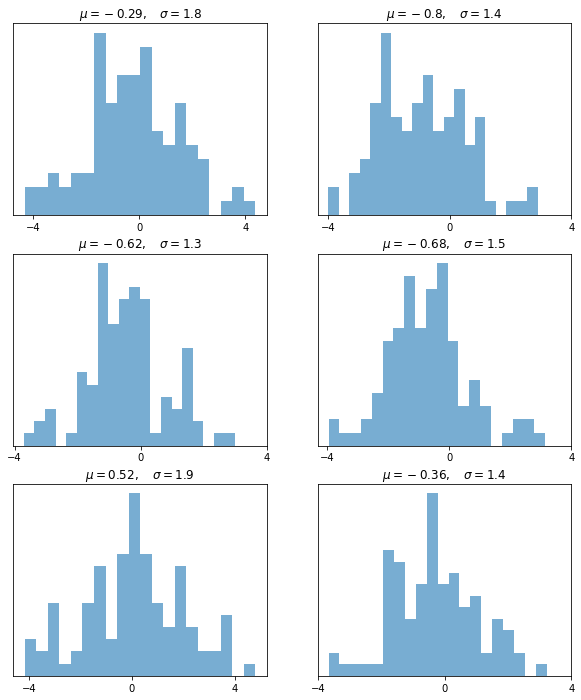

In [11]:
num_rows, num_cols = 3, 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 12))
for i in range(num_rows):
    for j in range(num_cols):
        m, s = uniform(-1, 1), uniform(1, 2)
        x = norm.rvs(loc=m, scale=s, size=100)
        axes[i, j].hist(x, alpha=0.6, bins=20)
        t = f'$\mu = {m:.2}, \quad \sigma = {s:.2}$'
        axes[i, j].set(title=t, xticks=[-4, 0, 4], yticks=[])
plt.show()

## Further Reading

- The [Matplotlib gallery](http://matplotlib.org/gallery.html) provides many examples
- A nice [Matplotlib tutorial](https://github.com/rougier/matplotlib-tutorial) by Nicolas Rougier, Mike Muller and Gael Varoquaux  